In [138]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [139]:
DATASET_FOLDER = "data"
TRAINING_ANNOTATION_FILE = os.path.join(DATASET_FOLDER, "train_ship_segmentations.csv")
TEST_ANNOTATION_FILE = os.path.join(DATASET_FOLDER, "test_ship_segmentations.csv")

df = pd.read_csv(TRAINING_ANNOTATION_FILE)

# Ship count distribution

In [140]:
df['ship_count'] = df.groupby('ImageId')['ImageId'].transform('count')
print("Number of images without ships: %d" % df.loc[df['EncodedPixels'].isnull()].size)
df.loc[df['EncodedPixels'].isnull().values,'ship_count'] = 0

Number of images without ships: 225000


count    131030.000000
mean          1.651378
std           2.999234
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          15.000000
Name: ship_count, dtype: float64


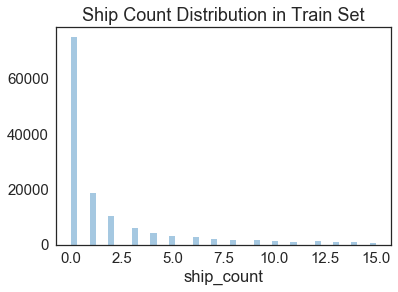

In [141]:
sns.set_style("white")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.distplot(df['ship_count'],kde=False)
plt.title('Ship Count Distribution in Train Set')

print(df['ship_count'].describe())

# Ship area size distribution

## Per ship

In [142]:
df['one_ship_area'] = df['EncodedPixels'].map(lambda x: sum(float(i) for i in str(x).split()[1::2]))

### With annotations of images without ships taken as well

count    131030.000000
mean        669.426818
std        2019.020543
min           0.000000
25%           0.000000
50%           0.000000
75%         243.000000
max       25904.000000
Name: one_ship_area, dtype: float64


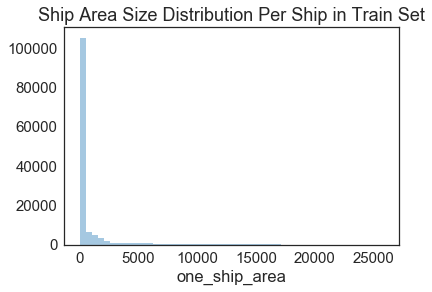

In [143]:
sns.set_style("white")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.distplot(df['one_ship_area'],kde=False)
plt.title('Ship Area Size Distribution Per Ship in Train Set')

print(df['one_ship_area'].describe())

### Only with annotations of ships that actually exist

In [144]:
one_ship_area_without_zeros = df.loc[df['one_ship_area'] != 0, 'one_ship_area']

count    56030.000000
mean      1565.500553
std       2851.370259
min          2.000000
25%        111.000000
50%        403.000000
75%       1541.000000
max      25904.000000
Name: one_ship_area, dtype: float64


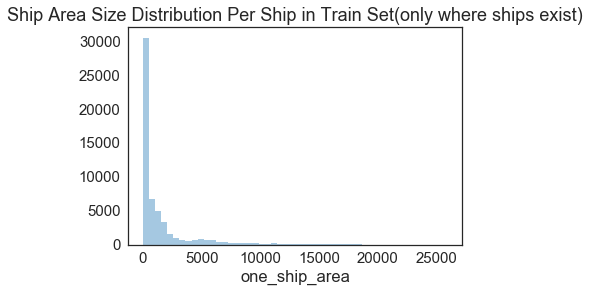

In [145]:
sns.set_style("white")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.distplot(one_ship_area_without_zeros,kde=False)
plt.title('Ship Area Size Distribution Per Ship in Train Set(only where ships exist)')

print(one_ship_area_without_zeros.describe())

## Per image

### With images without ships as well

In [146]:
df['image_ship_area'] = df.groupby('ImageId')['one_ship_area'].transform('sum')
df.loc[df['EncodedPixels'].isnull().values,'image_ship_area'] = 0

count    131030.000000
mean       1615.142990
std        3732.216376
min           0.000000
25%           0.000000
50%           0.000000
75%        1256.000000
max       76720.000000
Name: image_ship_area, dtype: float64


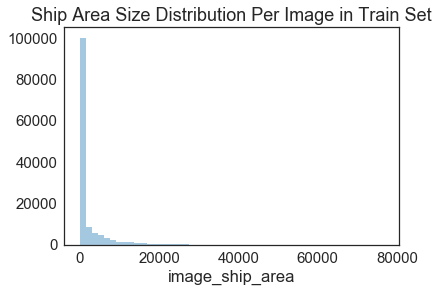

In [147]:
sns.set_style("white")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.distplot(df['image_ship_area'],kde=False)
plt.title('Ship Area Size Distribution Per Image in Train Set')

print(df['image_ship_area'].describe())

### Only with images containing any ships

In [148]:
image_ship_area_without_zeros = df.loc[df['image_ship_area'] != 0, 'image_ship_area']

count    56030.000000
mean      3777.122720
std       4940.553963
min         10.000000
25%        419.000000
50%       1852.000000
75%       5326.000000
max      76720.000000
Name: image_ship_area, dtype: float64


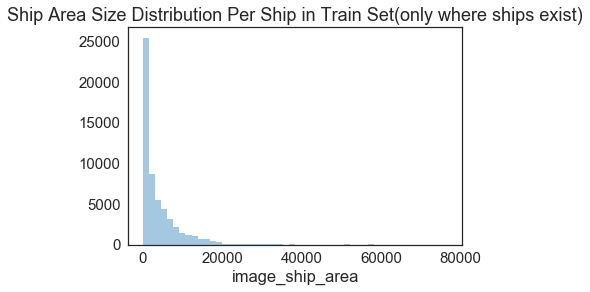

In [149]:
sns.set_style("white")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.distplot(image_ship_area_without_zeros,kde=False)
plt.title('Ship Area Size Distribution Per Ship in Train Set(only where ships exist)')

print(image_ship_area_without_zeros.describe())